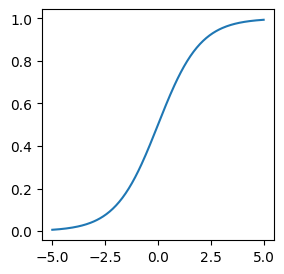

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1+np.exp(-z))
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,sigmoid(z))
plt.show()

In [2]:
import tensorflow as tf

dense = tf.keras.layers.Dense(50,activation='relu',
                              kernel_initializer='he_normal')

In [3]:
he_avg_int = tf.keras.initializers.VarianceScaling(scale=2,mode='fan_avg',
                                                   distribution='uniform')
dense = tf.keras.layers.Dense(50,activation='sigmoid',
                              kernel_initializer=he_avg_int)

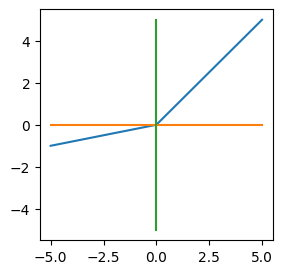

In [4]:
def leaky_relu(z,alpha):
    return np.maximum(alpha * z,z)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,leaky_relu(z,0.2))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

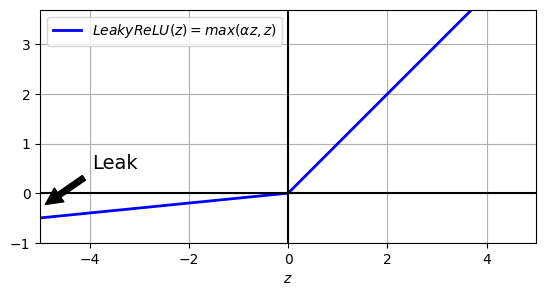

In [5]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props,
             fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

plt.show()

In [6]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2) #default alpha = 0.3
dense = tf.keras.layers.Dense(50,activation=leaky_relu,
                              kernel_initializer='he_normal')

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50,kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(alpha=0.2)
])

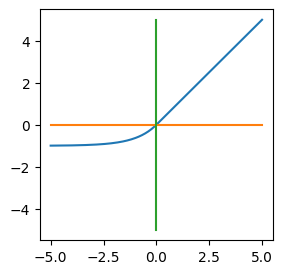

In [8]:
def elu(z,alpha=1):
    return np.where(z<0,alpha * (np.exp(z)-1),z)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,elu(z))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

In [9]:
dense = tf.keras.layers.Dense(50,activation='elu',kernel_initializer='he_normal')

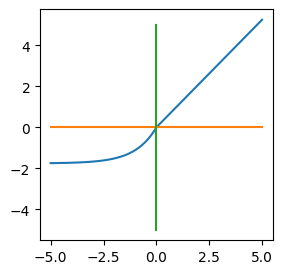

In [10]:
from scipy.special import erfc
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)
def selu(z,scale=scale_0_1,alpha=alpha_0_1):
    return scale * elu(z,alpha)
z = np.linspace(-5,5,200)
plt.figure(figsize=(3,3))
plt.plot(z,selu(z))
plt.plot([-5,5],[0,0])
plt.plot([0,0],[-5,5])
plt.show()

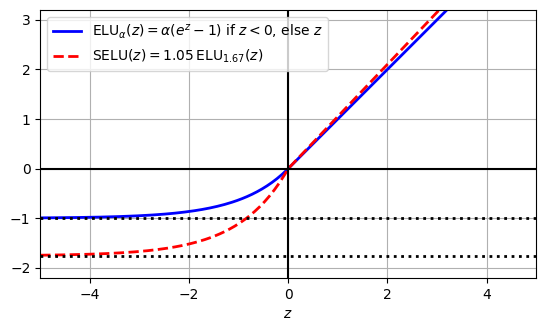

In [11]:
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

plt.show()

In [12]:
dense = tf.keras.layers.Dense(50, activation='selu',
                              kernel_initializer='lecun_normal')

In [13]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation='selu',
                                    kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,10

 Total params: 1,079,410 (4.12 MB)

 Trainable params: 1,079,410 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]
X_train,X_valid,X_test = X_train/255,X_valid/255,X_test/255

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
pixel_means = X_train.mean(axis=0,keepdims=True)
pixel_stds = X_train.std(axis=0,keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [19]:
history = model.fit(X_train_scaled,y_train,epochs=5,
                    validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.5263 - loss: 1.2058 - val_accuracy: 0.6936 - val_loss: 0.8137
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6932 - loss: 0.7936 - val_accuracy: 0.7364 - val_loss: 0.6863
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7472 - loss: 0.6714 - val_accuracy: 0.7674 - val_loss: 0.6600
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7695 - loss: 0.6210 - val_accuracy: 0.7936 - val_loss: 0.5654
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7941 - loss: 0.5547 - val_accuracy: 0.7802 - val_loss: 0.6042


In [20]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train_scaled,y_train,epochs=5,
                    validation_data=(X_valid_scaled,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.2245 - loss: 1.9823 - val_accuracy: 0.3148 - val_loss: 1.7257
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3744 - loss: 1.5002 - val_accuracy: 0.4770 - val_loss: 1.2501
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5304 - loss: 1.1116 - val_accuracy: 0.5934 - val_loss: 0.9617
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5956 - loss: 0.9745 - val_accuracy: 0.6858 - val_loss: 0.8174
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6544 - loss: 0.8542 - val_accuracy: 0.4302 - val_loss: 1.4248


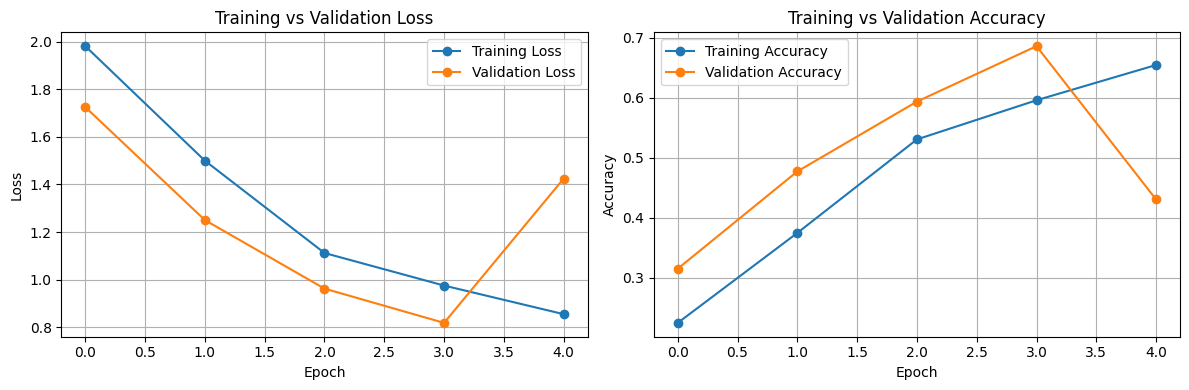

In [23]:
# Plot Training vs Validation Loss
plt.figure(figsize=(12, 4))

# ---- LOSS ----
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# ---- ACCURACY ----
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

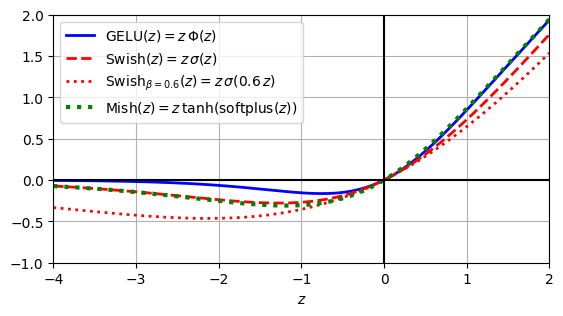

In [24]:
def swish(z,beta=1):
    return z * sigmoid(beta*z)
def approx_gelu(z):
    return swish(z,beta=1.702)
def softplus(z):
    return np.log(1+np.exp(z))
def mish(z):
    return z * np.tanh(softplus(z))
z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

plt.show()

In [25]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [28]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [29]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8093 - loss: 0.5505 - val_accuracy: 0.8588 - val_loss: 0.3938
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8629 - loss: 0.3912 - val_accuracy: 0.8666 - val_loss: 0.3600


In [30]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(100,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [32]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,
          validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7966 - loss: 0.6026 - val_accuracy: 0.8408 - val_loss: 0.4385
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8537 - loss: 0.4200 - val_accuracy: 0.8566 - val_loss: 0.3990


In [33]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer)

In [34]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer)

In [35]:
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8704 - loss: 0.3679 - val_accuracy: 0.8664 - val_loss: 0.3737
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8786 - loss: 0.3443 - val_accuracy: 0.8702 - val_loss: 0.3673


In [36]:
pos_class_id = class_names.index('Pullover')
neg_class_id = class_names.index('T-shirt/top')

def split_dataset(X,y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id,pos_class_id]))
    for old_class_id,new_class_id in zip(old_class_ids,range(8)):
        y_A[y_A == old_class_id] = new_class_id
    return ((X[~y_for_B],y_A),(X[y_for_B],y_B))

(X_train_A,y_train_A),(X_train_B,y_train_B) = split_dataset(X_train,y_train)
(X_valid_A,y_valid_A),(X_valid_B,y_valid_B) = split_dataset(X_valid,y_valid)
(X_test_A,y_test_A),(X_test_B,y_test_B) = split_dataset(X_test,y_test)

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8,activation='softmax')
])

model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])
history = model.fit(X_train_A,y_train_A,epochs=20,
                    validation_data=(X_valid_A,y_valid_A))
model_A.save('my_model_A.keras')

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8012 - loss: 0.6092 - val_accuracy: 0.9020 - val_loss: 0.2831
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9043 - loss: 0.2785 - val_accuracy: 0.9150 - val_loss: 0.2513
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9178 - loss: 0.2402 - val_accuracy: 0.9203 - val_loss: 0.2379
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9251 - loss: 0.2171 - val_accuracy: 0.9215 - val_loss: 0.2298
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9307 - loss: 0.2000 - val_accuracy: 0.9235 - val_loss: 0.2247
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9362 - loss: 0.1861 - val_accuracy: 0.9235 - val_loss: 0.2218
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9405 - loss: 0.1740 - val_accuracy: 0.9238 - val_loss: 0.2198
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9443 - loss: 0.1634 - 

In [37]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_B.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])
history = model_B.fit(X_train_B,y_train_B,epochs=20,
                      validation_data=(X_valid_B,y_valid_B))
model_B.evaluate(X_test_B,y_test_B)

Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8699 - loss: 0.4204 - val_accuracy: 0.9466 - val_loss: 0.2673
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9480 - loss: 0.2223 - val_accuracy: 0.9466 - val_loss: 0.1826
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9512 - loss: 0.1728 - val_accuracy: 0.9456 - val_loss: 0.1543
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9522 - loss: 0.1544 - val_accuracy: 0.9466 - val_loss: 0.1422
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9535 - loss: 0.1452 - val_accuracy: 0.9496 - val_loss: 0.1356
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9549 - loss: 0.1395 - val_accuracy: 0.9476 - val_loss: 0.1312
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9560 - loss: 0.1354 - val_accuracy: 0.9496 - val_loss: 0.1281
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9573 - loss: 0.1322 - val_accuracy: 0.

[0.121163509786129, 0.9629999995231628]

In [38]:
model_A = tf.keras.models.load_model('my_model_A.keras')
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [39]:
tf.random.set_seed(42)

In [40]:
model_A_clone =tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [41]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [42]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,
                     metrics=['accuracy'])

In [43]:
history = model_B_on_A.fit(X_train_B,y_train_B,epochs=4,
                           validation_data=(X_valid_B,y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,
                     metrics=['accuracy'])
history = model_B_on_A.fit(X_train_B,y_train_B,epochs=16,
                           validation_data=(X_valid_B,y_valid_B))

Epoch 1/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5925 - loss: 0.6704 - val_accuracy: 0.6419 - val_loss: 0.6585
Epoch 2/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6654 - loss: 0.6479 - val_accuracy: 0.7132 - val_loss: 0.6366
Epoch 3/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7285 - loss: 0.6271 - val_accuracy: 0.7755 - val_loss: 0.6163
Epoch 4/4
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7778 - loss: 0.6078 - val_accuracy: 0.8101 - val_loss: 0.5975
Epoch 1/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9261 - loss: 0.3543 - val_accuracy: 0.9466 - val_loss: 0.2306
Epoch 2/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9483 - loss: 0.2015 - val_accuracy: 0.9515 - val_loss: 0.1719
Epoch 3/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9521 - loss: 0.1677 - val_accuracy: 0.9515 - val_loss: 0.1515
Epoch 4/16
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9538 - loss: 0.1539 - val_accuracy: 0.9545

In [44]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.9600 - loss: 0.1239


[0.1239234209060669, 0.9599999785423279]

In [45]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28,28]),
        tf.keras.layers.Dense(100,activation='relu',
                              kernel_initializer='he_normal'),
        tf.keras.layers.Dense(100,activation='relu',
                        kernel_initializer='he_normal'),
        tf.keras.layers.Dense(100,activation='relu',
                        kernel_initializer='he_normal'),
        tf.keras.layers.Dense(10,activation='softmax')
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
                  metrics=['accuracy'])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid,y_valid))

In [46]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [47]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5671 - loss: 1.3903 - val_accuracy: 0.7190 - val_loss: 0.8866
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7275 - loss: 0.7919 - val_accuracy: 0.7660 - val_loss: 0.6971
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7716 - loss: 0.6680 - val_accuracy: 0.7932 - val_loss: 0.6163
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7964 - loss: 0.6011 - val_accuracy: 0.8108 - val_loss: 0.5674
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8104 - loss: 0.5581 - val_accuracy: 0.8180 - val_loss: 0.5351
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8205 - loss: 0.5285 - val_accuracy: 0.8280 - val_loss: 0.5117
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8269 - loss: 0.5066 - val_accuracy: 0.8288 - val_loss: 0.4948
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8317 - loss: 0.4899 - 

In [48]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [49]:
history_momentum = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7632 - loss: 0.7035 - val_accuracy: 0.8194 - val_loss: 0.5081
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8365 - loss: 0.4680 - val_accuracy: 0.8332 - val_loss: 0.4634
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8520 - loss: 0.4221 - val_accuracy: 0.8466 - val_loss: 0.4294
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8600 - loss: 0.3946 - val_accuracy: 0.8548 - val_loss: 0.4042
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8674 - loss: 0.3743 - val_accuracy: 0.8596 - val_loss: 0.3888
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8725 - loss: 0.3586 - val_accuracy: 0.8630 - val_loss: 0.3771
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8764 - loss: 0.3457 - val_accuracy: 0.8660 - val_loss: 0.3687
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8799 - loss: 0.3343 - 

In [50]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

In [51]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7685 - loss: 0.6920 - val_accuracy: 0.8320 - val_loss: 0.4843
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8405 - loss: 0.4588 - val_accuracy: 0.8466 - val_loss: 0.4312
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8548 - loss: 0.4163 - val_accuracy: 0.8572 - val_loss: 0.4042
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8631 - loss: 0.3905 - val_accuracy: 0.8614 - val_loss: 0.3876
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8689 - loss: 0.3716 - val_accuracy: 0.8628 - val_loss: 0.3820
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8732 - loss: 0.3562 - val_accuracy: 0.8650 - val_loss: 0.3706
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8774 - loss: 0.3433 - val_accuracy: 0.8682 - val_loss: 0.3647
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8809 - loss: 0.3320 - 

In [52]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [53]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6975 - loss: 0.9797 - val_accuracy: 0.7826 - val_loss: 0.6631
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7940 - loss: 0.6207 - val_accuracy: 0.8048 - val_loss: 0.5713
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8129 - loss: 0.5583 - val_accuracy: 0.8184 - val_loss: 0.5319
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8231 - loss: 0.5257 - val_accuracy: 0.8248 - val_loss: 0.5083
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8297 - loss: 0.5046 - val_accuracy: 0.8314 - val_loss: 0.4920
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8347 - loss: 0.4892 - val_accuracy: 0.8334 - val_loss: 0.4798
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8382 - loss: 0.4774 - val_accuracy: 0.8354 - val_loss: 0.4702
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8413 - loss: 0.4677 - 

In [54]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)

In [55]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8165 - loss: 0.5131 - val_accuracy: 0.8314 - val_loss: 0.4327
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8593 - loss: 0.3887 - val_accuracy: 0.8562 - val_loss: 0.3952
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8707 - loss: 0.3614 - val_accuracy: 0.8678 - val_loss: 0.3863
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8775 - loss: 0.3464 - val_accuracy: 0.8596 - val_loss: 0.3904
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8804 - loss: 0.3413 - val_accuracy: 0.8592 - val_loss: 0.4245
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8816 - loss: 0.3364 - val_accuracy: 0.8660 - val_loss: 0.4059
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8848 - loss: 0.3311 - val_accuracy: 0.8592 - val_loss: 0.4493
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8859 - loss: 0.3332 - 

In [56]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

In [57]:
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8213 - loss: 0.4958 - val_accuracy: 0.8400 - val_loss: 0.4179
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8631 - loss: 0.3737 - val_accuracy: 0.8262 - val_loss: 0.4468
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8757 - loss: 0.3362 - val_accuracy: 0.8456 - val_loss: 0.4087
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8857 - loss: 0.3103 - val_accuracy: 0.8526 - val_loss: 0.3981
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8911 - loss: 0.2921 - val_accuracy: 0.8462 - val_loss: 0.4228
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8958 - loss: 0.2769 - val_accuracy: 0.8556 - val_loss: 0.3936
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9017 - loss: 0.2627 - val_accuracy: 0.8672 - val_loss: 0.3717
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9055 - loss: 0.2505 - 

In [58]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001,beta_1=0.9,
                                       beta_2=0.999)

In [59]:
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8135 - loss: 0.5363 - val_accuracy: 0.8362 - val_loss: 0.4366
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8581 - loss: 0.3971 - val_accuracy: 0.8542 - val_loss: 0.3877
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8721 - loss: 0.3577 - val_accuracy: 0.8578 - val_loss: 0.3685
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8806 - loss: 0.3323 - val_accuracy: 0.8592 - val_loss: 0.3668
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8868 - loss: 0.3135 - val_accuracy: 0.8658 - val_loss: 0.3557
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8920 - loss: 0.2978 - val_accuracy: 0.8684 - val_loss: 0.3559
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8968 - loss: 0.2848 - val_accuracy: 0.8708 - val_loss: 0.3489
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9004 - loss: 0.2730 - 

In [60]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9,
                                      beta_2=0.999)

In [61]:
history_nadam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8295 - loss: 0.4814 - val_accuracy: 0.8386 - val_loss: 0.4253
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8668 - loss: 0.3638 - val_accuracy: 0.8508 - val_loss: 0.3976
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8800 - loss: 0.3280 - val_accuracy: 0.8508 - val_loss: 0.3861
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8875 - loss: 0.3049 - val_accuracy: 0.8562 - val_loss: 0.3837
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8947 - loss: 0.2860 - val_accuracy: 0.8732 - val_loss: 0.3578
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8987 - loss: 0.2726 - val_accuracy: 0.8650 - val_loss: 0.3902
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9046 - loss: 0.2590 - val_accuracy: 0.8700 - val_loss: 0.3865
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9068 - loss: 0.2471 - 

In [62]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5,learning_rate=0.001,
                                      beta_1=0.9,beta_2=0.999)

In [63]:
history_adamw = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8195 - loss: 0.5003 - val_accuracy: 0.8290 - val_loss: 0.4361
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8625 - loss: 0.3761 - val_accuracy: 0.8416 - val_loss: 0.4095
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8762 - loss: 0.3387 - val_accuracy: 0.8488 - val_loss: 0.3974
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8843 - loss: 0.3152 - val_accuracy: 0.8630 - val_loss: 0.3609
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8907 - loss: 0.2950 - val_accuracy: 0.8636 - val_loss: 0.3656
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8961 - loss: 0.2802 - val_accuracy: 0.8730 - val_loss: 0.3524
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8991 - loss: 0.2683 - val_accuracy: 0.8690 - val_loss: 0.3634
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9058 - loss: 0.2539 - 

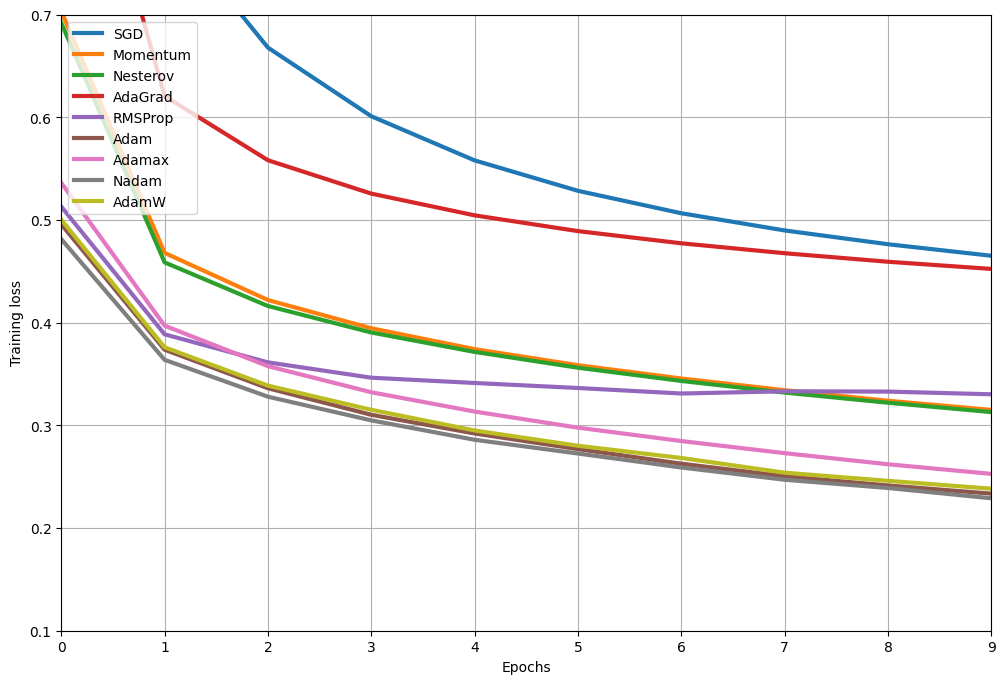

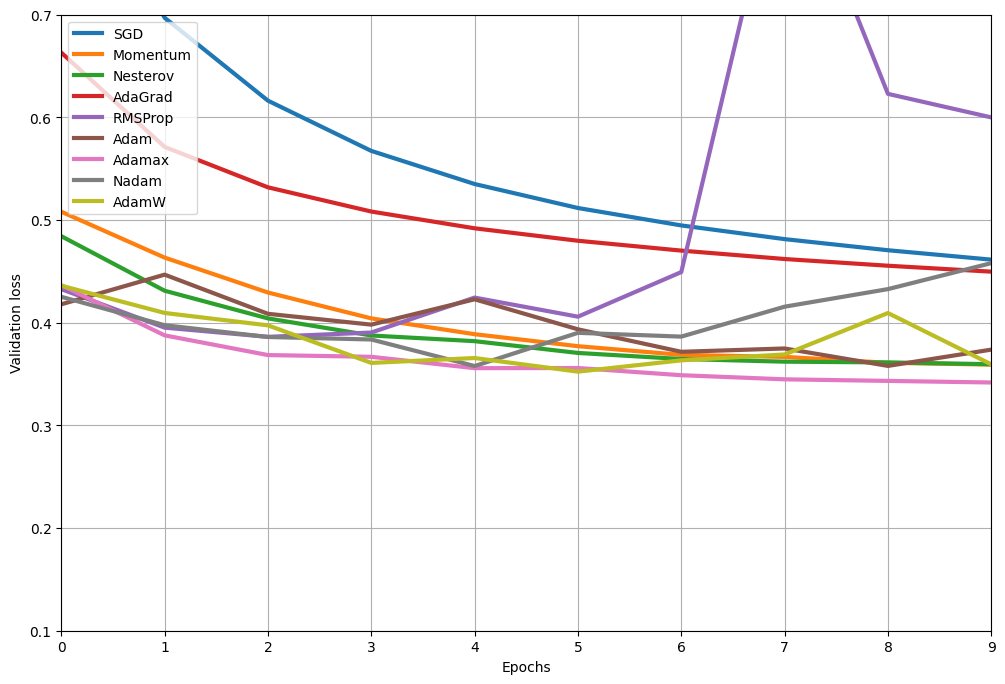

In [64]:
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam, history_adamw),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

In [65]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate = 0.01,
    decay_steps = 10_000,
    decay_rate = 1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)

In [66]:
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7616 - loss: 0.7016 - val_accuracy: 0.8218 - val_loss: 0.4971
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8334 - loss: 0.4740 - val_accuracy: 0.8326 - val_loss: 0.4524
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8479 - loss: 0.4305 - val_accuracy: 0.8394 - val_loss: 0.4318
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8559 - loss: 0.4055 - val_accuracy: 0.8460 - val_loss: 0.4173
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8626 - loss: 0.3880 - val_accuracy: 0.8514 - val_loss: 0.4076
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8665 - loss: 0.3745 - val_accuracy: 0.8552 - val_loss: 0.3989
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8705 - loss: 0.3636 - val_accuracy: 0.8576 - val_loss: 0.3913
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8736 - loss: 0.3546 - 

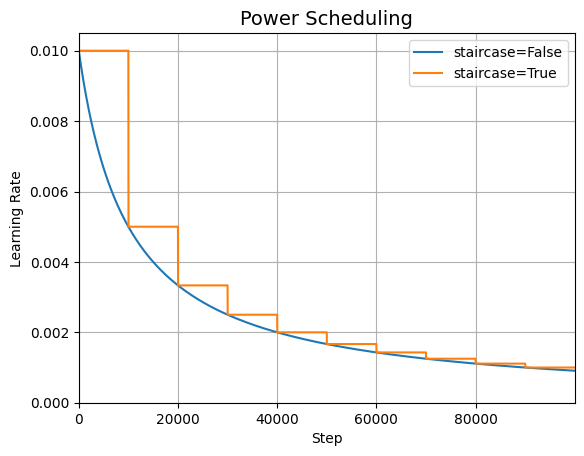

In [67]:
initial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000

steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [68]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.01,
    decay_steps = 20_000,
    decay_rate = 0.1,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [69]:
history_exponential_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7621 - loss: 0.7001 - val_accuracy: 0.8252 - val_loss: 0.4879
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8323 - loss: 0.4771 - val_accuracy: 0.8348 - val_loss: 0.4476
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8468 - loss: 0.4345 - val_accuracy: 0.8416 - val_loss: 0.4291
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8553 - loss: 0.4099 - val_accuracy: 0.8460 - val_loss: 0.4141
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8616 - loss: 0.3933 - val_accuracy: 0.8492 - val_loss: 0.4038
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8651 - loss: 0.3812 - val_accuracy: 0.8536 - val_loss: 0.3945
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8680 - loss: 0.3721 - val_accuracy: 0.8556 - val_loss: 0.3870
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8705 - loss: 0.3649 - 

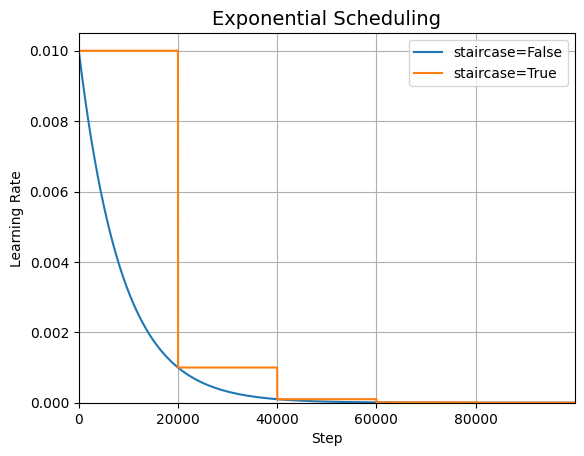

In [70]:
initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [71]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch / 20)

In [72]:
def exponential_decay(lr0,s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn
exponential_decay_fn = exponential_decay(lr0=0.01,s=20)

In [73]:
tf.random.set_seed(42)
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])

In [74]:
n_epochs = 20

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train,y_train,epochs=n_epochs,
                    validation_data = (X_valid,y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7633 - loss: 0.6954 - val_accuracy: 0.8242 - val_loss: 0.4942 - learning_rate: 0.0100
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8342 - loss: 0.4755 - val_accuracy: 0.8362 - val_loss: 0.4506 - learning_rate: 0.0089
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8494 - loss: 0.4299 - val_accuracy: 0.8418 - val_loss: 0.4317 - learning_rate: 0.0079
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8569 - loss: 0.4030 - val_accuracy: 0.8486 - val_loss: 0.4154 - learning_rate: 0.0071
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8639 - loss: 0.3840 - val_accuracy: 0.8516 - val_loss: 0.4019 - learning_rate: 0.0063
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8684 - loss: 0.3696 - val_accuracy: 0.8558 - val_loss: 0.3918 - learning_rate: 0.0056
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8725 - l

In [75]:
def exponential_decay_fn(epoch,lr):
    return lr * 0.1 ** (1/20)

In [76]:
K = tf.keras.backend

class ExponentialDecay(tf.keras.callbacks.Callback):
    def __init__(self,n_steps=40_000):
        super().__init__()
        self.n_steps = n_steps
    
    def on_batch_begin(self, batch, logs = None):
        # Batch argument is reset at every epoch
        lr = self.model.optimizer.learning_rate.numpy()
        new_learning_rate = lr * 0.1 ** (1/self.n_steps)
        self.model.optimizer.learning_rate = new_learning_rate
    
    def on_epoch_end(self, epoch, logs = None):
        logs = logs or {}
        logs['lr'] = self.model.optimizer.learning_rate.numpy()

In [77]:
lr0 = 0.01
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate = lr0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])

In [78]:
import math

batch_size = 32
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
exp_decay = ExponentialDecay(n_steps)
history = model.fit(X_train,y_train,epochs=n_epochs,
                    validation_data = (X_valid,y_valid),
                    callbacks=[exp_decay])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7647 - loss: 0.6982 - val_accuracy: 0.8294 - val_loss: 0.4897 - lr: 0.0089
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8365 - loss: 0.4702 - val_accuracy: 0.8382 - val_loss: 0.4485 - lr: 0.0079
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8513 - loss: 0.4253 - val_accuracy: 0.8464 - val_loss: 0.4287 - lr: 0.0071
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8595 - loss: 0.3992 - val_accuracy: 0.8500 - val_loss: 0.4151 - lr: 0.0063
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8649 - loss: 0.3810 - val_accuracy: 0.8546 - val_loss: 0.4020 - lr: 0.0056
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8697 - loss: 0.3671 - val_accuracy: 0.8580 - val_loss: 0.3910 - lr: 0.0050
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8731 - loss: 0.3560 - val_accuracy: 0.8600 - val_loss: 0.3832 - lr: 0.0045

In [79]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries = [50_000 * n_epochs // batch_size, 80_000 * n_epochs // batch_size],
    values = [0.01, 0.005, 0.001]
)
optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)

In [80]:
history_piecewise_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7663 - loss: 0.6790 - val_accuracy: 0.8282 - val_loss: 0.4892
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8340 - loss: 0.4678 - val_accuracy: 0.8414 - val_loss: 0.4479
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8496 - loss: 0.4217 - val_accuracy: 0.8456 - val_loss: 0.4314
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8595 - loss: 0.3931 - val_accuracy: 0.8502 - val_loss: 0.4154
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8657 - loss: 0.3727 - val_accuracy: 0.8528 - val_loss: 0.4039
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8716 - loss: 0.3562 - val_accuracy: 0.8552 - val_loss: 0.3936
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8762 - loss: 0.3425 - val_accuracy: 0.8544 - val_loss: 0.3904
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8801 - loss: 0.3309 - 

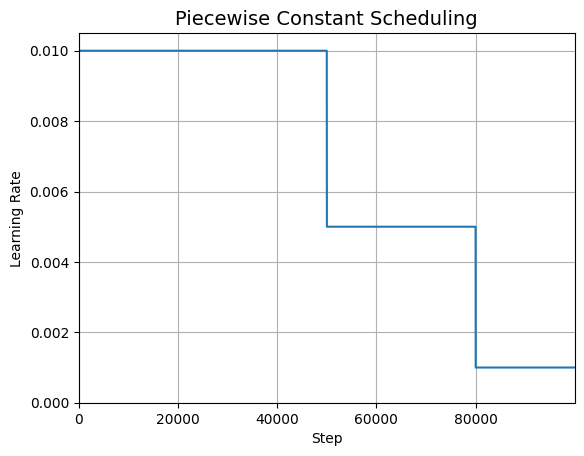

In [81]:
boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

steps = np.arange(100_000)

lrs = np.full(len(steps), values[0])
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [82]:
def piecewise_constant_fn(epoch):
    if epoch > 5:
        return 0.01
    if epoch < 15:
        return 0.005
    else:
        return 0.001

In [83]:
def piecewise_constant(boundaries,values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[(boundaries > epoch).argmax() - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [84]:
n_epochs = 25

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = build_model()
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=n_epochs,
                    validation_data = (X_valid,y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8069 - loss: 0.5440 - val_accuracy: 0.8250 - val_loss: 0.4846 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8396 - loss: 0.4551 - val_accuracy: 0.8368 - val_loss: 0.4549 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8477 - loss: 0.4360 - val_accuracy: 0.8292 - val_loss: 0.5160 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8488 - loss: 0.4275 - val_accuracy: 0.8384 - val_loss: 0.4562 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8544 - loss: 0.4106 - val_accuracy: 0.8352 - val_loss: 0.4566 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8705 - loss: 0.3601 - val_accuracy: 0.8524 - val_loss: 0.4028 - learning_rate: 0.0050
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8737 - l

In [85]:
for name in sorted(dir(tf.keras.optimizers.schedules)):
    if name[0] == name[0].lower():  # must start with capital letter
        continue
    scheduler_class = getattr(tf.keras.optimizers.schedules, name)
    print(f"• {name} – {scheduler_class.__doc__.splitlines()[0]}")

• CosineDecay – A `LearningRateSchedule` that uses a cosine decay with optional warmup.
• CosineDecayRestarts – A `LearningRateSchedule` that uses a cosine decay schedule with restarts.
• ExponentialDecay – A `LearningRateSchedule` that uses an exponential decay schedule.
• InverseTimeDecay – A `LearningRateSchedule` that uses an inverse time decay schedule.
• LearningRateSchedule – The learning rate schedule base class.
• PiecewiseConstantDecay – A `LearningRateSchedule` that uses a piecewise constant decay schedule.
• PolynomialDecay – A `LearningRateSchedule` that uses a polynomial decay schedule.


In [86]:
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])

In [87]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)
history = model.fit(X_train,y_train,epochs=n_epochs,
                    validation_data=(X_valid,y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7542 - loss: 0.7173 - val_accuracy: 0.8298 - val_loss: 0.4944 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8325 - loss: 0.4768 - val_accuracy: 0.8380 - val_loss: 0.4547 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8479 - loss: 0.4290 - val_accuracy: 0.8412 - val_loss: 0.4381 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8567 - loss: 0.4004 - val_accuracy: 0.8466 - val_loss: 0.4226 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8640 - loss: 0.3789 - val_accuracy: 0.8502 - val_loss: 0.4115 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8701 - loss: 0.3616 - val_accuracy: 0.8532 - val_loss: 0.4026 - learning_rate: 0.0100
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8748 - l

In [88]:
import math

batch_size = 32
n_epochs = 25
n_steps = n_epochs*math.ceil(len(X_train) / batch_size)
scheduled_learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,decay_steps=n_steps,decay_rate=0.1)
optimizer = tf.keras.optimizers.SGD(learning_rate = scheduled_learning_rate)

In [89]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self,factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    
    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0
    
    def on_batch_end(self,batch,logs = None):
        mean_epoch_loss = logs['loss']
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        lr = self.model.optimizer.learning_rate.numpy()
        self.rates.append(lr)
        self.losses.append(batch_loss)
        self.model.optimizer.learning_rate = lr * self.factor

In [90]:
def find_learning_rate(model,X,y,epochs=1,batch_size=32,min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X)/batch_size)*epochs
    factor = (max_rate/min_rate) ** (1/iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    model.optimizer.learning_rate = min_rate
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X,y,epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    model.optimizer.learning_rate = init_lr
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [91]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

In [92]:
model = build_model()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3482 - loss: nan  


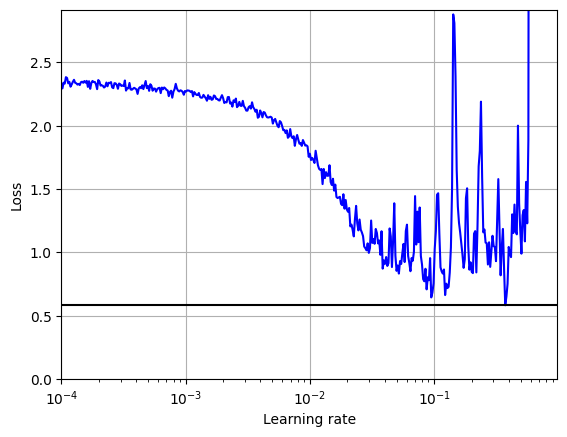

In [93]:
batch_size=128
rates,losses = find_learning_rate(model,X_train,y_train,epochs=1,
                                  batch_size=batch_size)
plot_lr_vs_loss(rates,losses)

In [94]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        self.model.optimizer.learning_rate = lr

In [95]:
model = build_model()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train)/batch_size) * n_epochs,
                             max_lr = 0.1)

history = model.fit(X_train,y_train,epochs=n_epochs,batch_size = batch_size,
                    validation_data=(X_valid,y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6891 - loss: 0.9559 - val_accuracy: 0.7898 - val_loss: 0.5977
Epoch 2/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7986 - loss: 0.5720 - val_accuracy: 0.8212 - val_loss: 0.5132
Epoch 3/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8251 - loss: 0.4983 - val_accuracy: 0.8178 - val_loss: 0.5060
Epoch 4/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8385 - loss: 0.4570 - val_accuracy: 0.8186 - val_loss: 0.4897
Epoch 5/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8488 - loss: 0.4263 - val_accuracy: 0.8258 - val_loss: 0.4741
Epoch 6/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8565 - loss: 0.4012 - val_accuracy: 0.8328 - val_loss: 0.4595
Epoch 7/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8627 - loss: 0.3818 - val_accuracy: 0.8388 - val_loss: 0.4437
Epoch 8/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8673 - loss: 0.3656 - val_accuracy: 0.

In [96]:
layers = tf.keras.layers.Dense(100,activation='relu',
                               kernel_initializer='he_normal',
                               kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [97]:
tf.random.set_seed(42)

In [98]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax",
                     kernel_initializer="glorot_normal")  # not in the book
])

In [99]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=2,
                    validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7720 - loss: 3.1298 - val_accuracy: 0.8238 - val_loss: 1.8607
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8152 - loss: 1.4271 - val_accuracy: 0.8246 - val_loss: 1.1195


In [100]:
tf.random.set_seed(42)

In [101]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

c:\Users\utkar\OneDrive\Desktop\Machine-learning-book\.ai\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [102]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=10,
                    validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7528 - loss: 0.6739 - val_accuracy: 0.8360 - val_loss: 0.4451
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8148 - loss: 0.5120 - val_accuracy: 0.8434 - val_loss: 0.4126
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8282 - loss: 0.4742 - val_accuracy: 0.8518 - val_loss: 0.3961
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8344 - loss: 0.4517 - val_accuracy: 0.8582 - val_loss: 0.3843
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8412 - loss: 0.4339 - val_accuracy: 0.8590 - val_loss: 0.3828
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8458 - loss: 0.4218 - val_accuracy: 0.8612 - val_loss: 0.3695
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8486 - loss: 0.4111 - val_accuracy: 0.8668 - val_loss: 0.3622
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8514 - loss: 0.4042 - 

In [103]:
model.evaluate(X_train,y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.8834 - loss: 0.3172


[0.3172478973865509, 0.883436381816864]

In [104]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8634 - loss: 0.3772


[0.3771829307079315, 0.8633999824523926]

In [105]:
model.evaluate(X_valid,y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.8704 - loss: 0.3531


[0.3530787229537964, 0.8704000115394592]

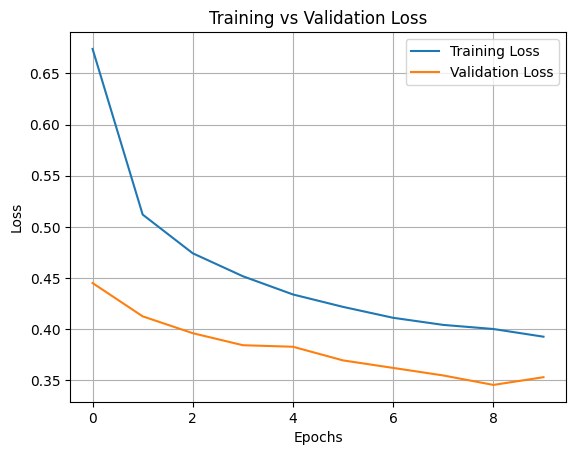

In [106]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\utkar\AppData\Local\Temp\ipykernel_2628\2957666783.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


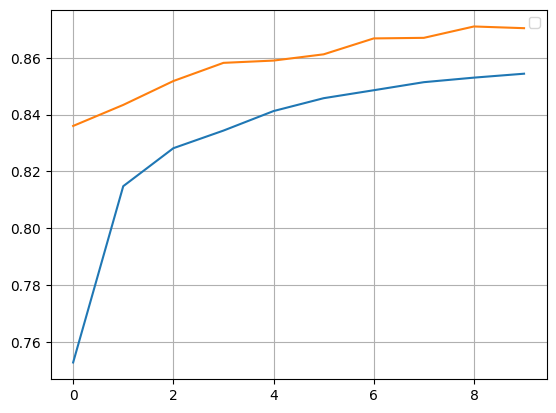

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend()
plt.grid(True)
plt.show()

In [108]:
import numpy as np

y_probas = np.stack([model(X_test, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)

In [109]:
model.predict(X_test[:1].round(3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[6.8087758e-07, 1.0667444e-06, 1.4910880e-07, 5.4971446e-07,
        7.1825554e-07, 1.0053894e-02, 1.6869640e-07, 7.5001232e-02,
        4.1122717e-06, 9.1493750e-01]], dtype=float32)

In [110]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.038, 0.   , 0.145, 0.   ,
       0.816], dtype=float32)